In [9]:
#importing useful modules

import pandas as pd
import numpy as np

import torch

In [10]:
#loading csv data in variables

train_data = np.array(pd.read_csv("./fashion-mnist-train.csv")).astype(np.float32)
test_data = np.array(pd.read_csv("./fashion-mnist-test.csv")).astype(np.float32)

In [11]:
#converting data to tensors

train_data = torch.from_numpy(train_data)
test_data = torch.from_numpy(test_data)

In [12]:
#creating dataloader objects to load data in batches of 100 to save cpu power and time

train_loader = torch.utils.data.DataLoader(train_data, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=100, shuffle=True)

In [13]:
#making Neural network using layered linear model
#using relu func to erase linearity in model
#using softmax to change predictions into probabilities

class FashionNetwork(torch.nn.Module):
    def __init__(self, input_dim, layer_dim, out_dim):
        super().__init__()
        self.linear1 = torch.nn.Linear(input_dim, layer_dim)
        self.linear2 = torch.nn.Linear(layer_dim, out_dim)
    
    def forward(self, inputs):
        inputs = inputs/255
        out = self.linear1(inputs)
        out = torch.relu(out)
        out = self.linear2(out)
        targets_pred = torch.softmax(out, dim=-1)
        
        return targets_pred
    

model = FashionNetwork(784,100,10)

In [14]:
#using binary cross entropy function to calculate loss

loss_fn = torch.nn.BCELoss()

In [15]:
#optimizer to do gradient decent

opt = torch.optim.SGD(model.parameters(), lr = 0.5)
# opt = torch.optim.Adam(model.parameters(), lr=0.005)

In [16]:
# Training Loop

epochs = 3
for epoch in range(epochs):
    for batch in train_loader:
        
        #taking inputs out of batch of the training dataset
        inputs = batch[:,1:785]
        
        #one hot encoding the targets after taking them out of the training dataset
        targets_cls = batch[:,0]
        targets = []
        for target in targets_cls:
            x = np.zeros(10)
            x[int(target)] = 1
            
            targets.append(x.astype(np.float32))
        
        #converting encoded targets to tensor
        targets = torch.tensor(targets)
        
        #putting inputs in model to get preds
        preds = model(inputs)
        #putting preds in loss_fn to get loss
        loss = loss_fn(preds, targets)
        
        loss.backward()
        #reducing the loss 
        opt.step()
        opt.zero_grad()
    
    print("Epoch:",epoch+1," Loss:",round(loss.item(),4))
    
    #Accuracy Calcution on the test dataset by unpacking it and aplying trained models
    correct = 0
    with torch.no_grad():
        for batch in test_loader:
            inputs_test = batch[:,1:785]
            targets_cls = batch[:,0]
            
            pred = model(inputs_test)
            for i in range(len(batch)):
                if (pred[i]==pred[i].max()).nonzero().item() == targets_cls[i]:
                    correct += 1
        
        acc = correct/len(test_data)
        print("Accuracy: ",round(acc*100,1),"%")
          

Epoch: 1  Loss: 0.0882
Accuracy:  80.2 %
Epoch: 2  Loss: 0.0722
Accuracy:  82.8 %
Epoch: 3  Loss: 0.089
Accuracy:  83.7 %
Epoch: 4  Loss: 0.0564
Accuracy:  85.0 %
Epoch: 5  Loss: 0.0987
Accuracy:  84.9 %


In [17]:
# The Function to load weights and bias's you like

# torch.save(model.state_dict(),'FashionMNIST-NeuralNetwork.pth')

model_pred = FashionNetwork(784,100,10)
try:
    model_pred.load_state_dict(torch.load("./saved_models/FashionMNIST-NeuralNetwork.pth"))
except:
    print("Error Occured in loading saved weights, using defaults")
    model_pred = model

Prediction:  4
Target:  4

0 T-shirt/top, 
1 Trouser, 
2 Pullover,
3 Dress,
4 Coat,
5 Sandal,
6 Shirt,
7 Sneaker,
8 Bag,
9 Ankle boot



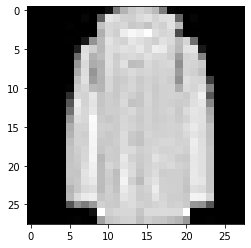

In [18]:
#Predict the class using the fully trained model
import matplotlib.pyplot as plt

index = 123

test_input = test_data[index,1:785]
pred = model_pred(test_input)

print("Prediction: ",(pred==pred.max()).nonzero().item())

target = test_data[index,0]
print("Target: ", int(target))
print("""
0 T-shirt/top, 
1 Trouser, 
2 Pullover,
3 Dress,
4 Coat,
5 Sandal,
6 Shirt,
7 Sneaker,
8 Bag,
9 Ankle boot
""")

#converting array to image and seeing it on a graph
plt.imshow(test_input.reshape(28,28),cmap="gray")